In [102]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
pd.set_option('display.max_colwidth', 30)
df = pd.read_csv('Leads.csv')

In [104]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6...,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dc...,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fd...,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading ...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19...,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a...,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading ...,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [105]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [106]:
def value_counts(series: 'pd.Series'):
    """
    Outputs value counts of a pandas Series in the form
    of a nice Dataframe.
    """
    counts = pd.DataFrame(series.value_counts())
    counts_norm = pd.DataFrame(series.value_counts(normalize=True))
    df = pd.merge(counts, counts_norm, left_index=True, right_index=True)
    df.columns = pd.MultiIndex.from_arrays(
        [[series._name, series._name],
         ['Counts', 'Normalised']])
    return df
value_counts(df['City'])

City           
                            Counts Normalised
Mumbai                        3222   0.412020
Select                        2249   0.287596
Thane & Outskirts              752   0.096164
Other Cities                   686   0.087724
Other Cities of Maharashtra    457   0.058440
Other Metro Cities             380   0.048593
Tier II Cities                  74   0.009463

In [107]:
df.shape

(9240, 37)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [109]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [110]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- This is done because as you can see above 'select' is a missing value

In [111]:
df = df.replace('Select', np.nan)

In [112]:
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [113]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [114]:
round(100*(df.isnull().sum())/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- Basically, the data for these columns were obtained after talking to the aspiring leads, therefore these columns cannot be used for a new lead

In [115]:
df = df.drop(['Last Activity', 'Tags', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Lead Quality', 'Asymmetrique Profile Score', 'Lead Profile', 'Asymmetrique Activity Score',], axis = 1)

In [116]:
round(100*(df.isnull().sum())/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [117]:
df = df.drop('How did you hear about X Education', axis = 1)

In [118]:
round(100*(df.isnull().sum())/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [119]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Canada                     4
Kuwait                     4
Germany                    4
Nigeria                    4
Sweden                     3
Uganda                     2
Philippines                2
China                      2
Ghana                      2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
Belgium                    2
Russia                     1
Denmark                    1
Tanzania                   1
Malaysia                   1
Switzerland                1
Sri Lanka                  1
Kenya         

In [120]:
df.Country.value_counts(normalize = True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
South Africa             0.059006
Canada                   0.059006
Kuwait                   0.059006
Germany                  0.059006
Nigeria                  0.059006
Sweden                   0.044254
Uganda                   0.029503
Philippines              0.029503
China                    0.029503
Ghana                    0.029503
Italy                    0.029503
Netherlands              0.029503
Asia/Pacific Region      0.029503
Bangladesh               0.029503
Belgium                  0.029503
Russia                   0.014751
Denmark       

In [121]:
df['Country'] = df.Country.replace(np.nan, 'India')

In [122]:
df.Country.isnull().sum()

0

In [123]:
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

<AxesSubplot:>

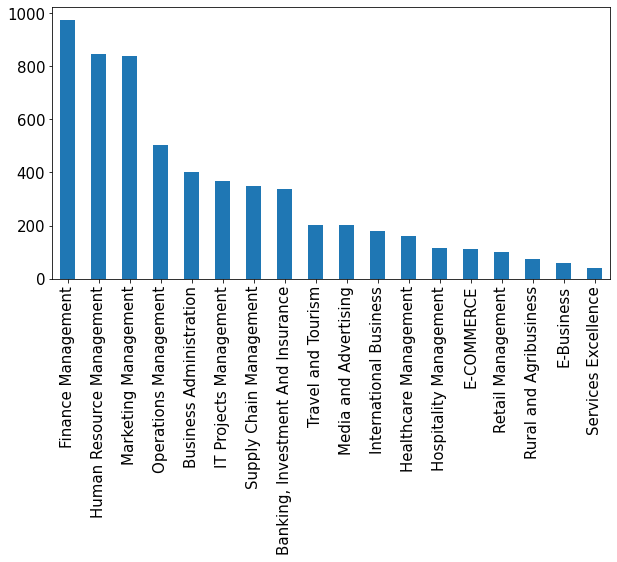

In [124]:
df.Specialization.value_counts().plot.bar(figsize=(10,5), fontsize=15)

In [125]:
df.Specialization.value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

- Values with low count are grouped to remove bias

In [126]:
df.Specialization = df['Specialization'].replace(
    ['Media and Advertising', 'Travel and Tourism', 'International Business',
     'Healthcare and Management', 'Hospitality Management', 'E-COMMERCE', 
     'Retail Management', 'Rural and Agribusiness', 'E-Business', 'Services Excellence'], 
    'Others')

In [127]:
df.Specialization.value_counts(normalize = True)*100

Others                               18.430034
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Healthcare Management                 2.713311
Name: Specialization, dtype: float64

In [128]:
df.Specialization = df.Specialization.replace(np.nan, 'Unselected')

In [129]:
df.Specialization.isnull().sum()

0

In [130]:
df['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [131]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [132]:
round(100*(df.isnull().sum())/len(df), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [133]:
df['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [134]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [135]:
df['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [136]:
df['City'].value_counts(normalize = True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [137]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [138]:
round(100*(df.isnull().sum())/len(df), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [139]:
df.dropna(inplace = True)

In [140]:
round(100*(df.isnull().sum())/len(df),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Lead Origin')

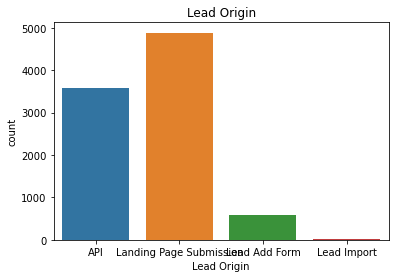

In [141]:
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

In [142]:
df.Converted.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Lead Origin')

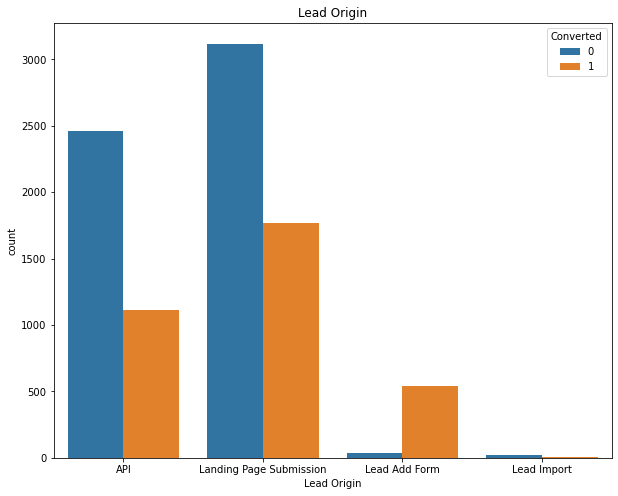

In [143]:
plt.figure(figsize = (10,8))
sns.countplot(df['Lead Origin'], hue = df['Converted'], data = df)
plt.title('Lead Origin')

- From here we can see that from the conversions of 'API' and 'Landing Page Submission' are good and these need to be improved and the conversion of 'Lead Add Form' is good for a low lead score, therefore more focus should be done here

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

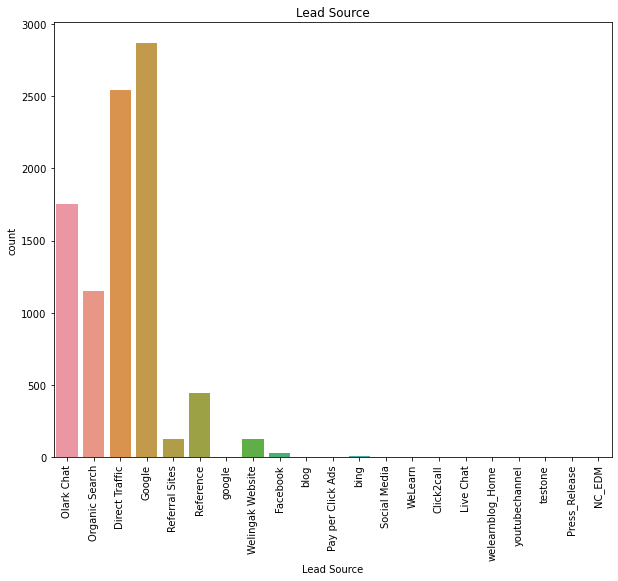

In [144]:
plt.figure(figsize = (10,8))
sns.countplot(df['Lead Source'])
plt.title('Lead Source')
plt.xticks(rotation = 90)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


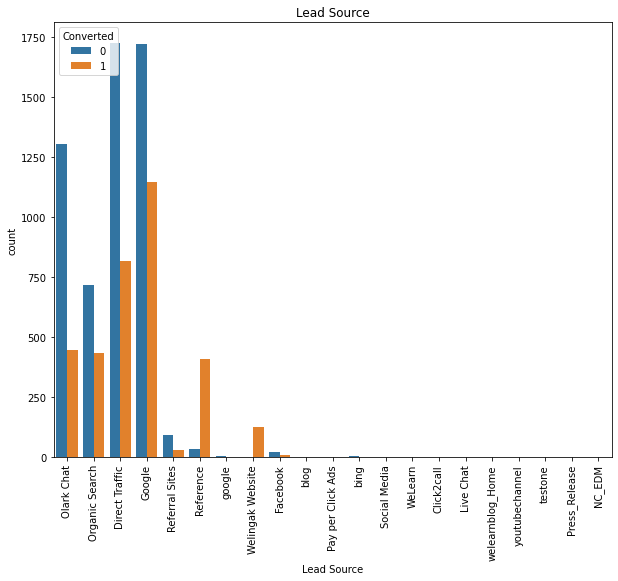

In [146]:
plt.figure(figsize = (10,8))
sns.countplot(df['Lead Source'], hue = df['Converted'], data = df, )
plt.title('Lead Source')
plt.xticks(rotation = 90);

- Binning lead sources as others because they all have negligable lead sources 

In [45]:
#df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
#df['Lead Source'] = df['Lead Source'].replace(['Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call','Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Others' )

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

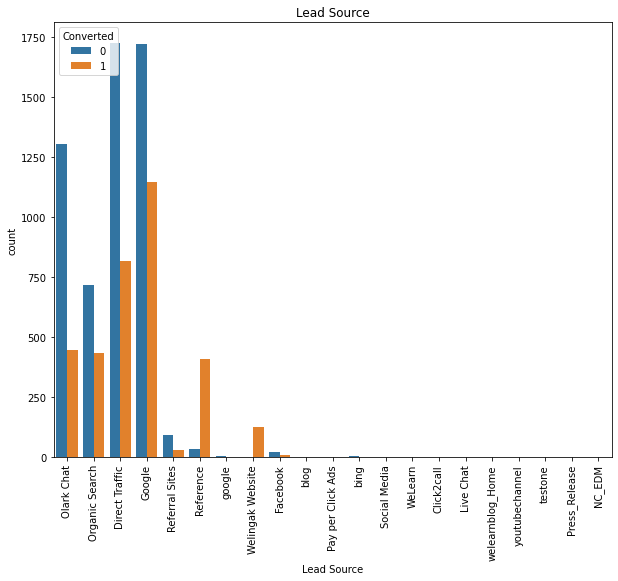

In [46]:
plt.figure(figsize = (10,8))
sns.countplot(df['Lead Source'], hue = df['Converted'], data = df)
plt.title('Lead Source')
plt.xticks(rotation = 90)

- For Olark Chat the Lead AMount is high and conversion is mediocre
- For Organic Search Lead Amount is Medium and conversion is also mediocre
- Direc Traffic Lead Amount is high and conversion is mediocre
- Google lead amount is high and conversion is slightly higher than mediocre
- Referral Sites lead amount is low and conversion is also low
- Reference lead amount is low but conversion is very high
- Welingak Website lead  amount is very low but conversion is high
- Others both lead amount and conversion is low

- So we should generate more leads from 'reference' and 'welingak website' and also incerease 'olark chat', 'google', 'organic Search','Direct Traffic', 

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Do Not Call')

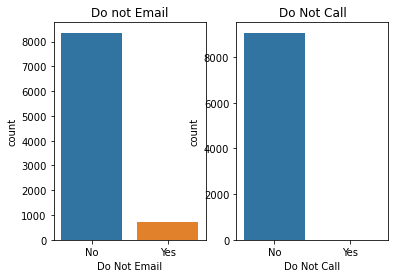

In [47]:
plt.subplot(1,2,1)
sns.countplot(df['Do Not Email'])
plt.title('Do not Email')

plt.subplot(1,2,2)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Do Not Call')

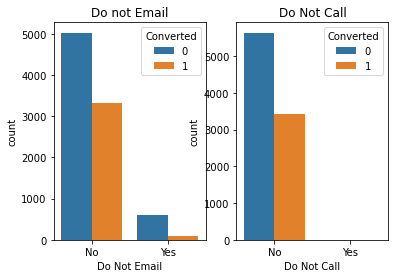

In [48]:
plt.subplot(1,2,1)
sns.countplot(df['Do Not Email'], hue = df['Converted'] , data = df)
plt.title('Do not Email')

plt.subplot(1,2,2)
sns.countplot(df['Do Not Call'], hue = df['Converted'], data = df)
plt.title('Do Not Call')

In [49]:
df['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [50]:
df =df.drop(['Do Not Email'], axis = 1)

In [51]:
df['Do Not Call'].value_counts() 

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [52]:
df =df.drop(['Do Not Call'], axis = 1)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

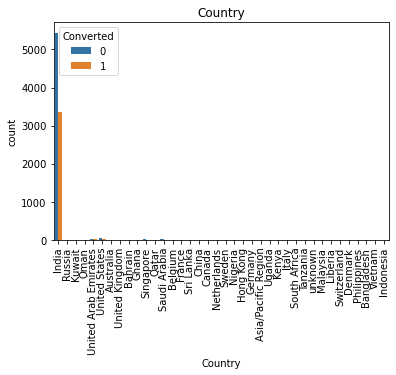

In [53]:
sns.countplot(df['Country'], hue = df['Converted'], data = df)
plt.title('Country')
plt.xticks(rotation = 90)

In [54]:
df = df.drop(['Country'], axis = 1)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Unselected'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'Operations Management'),
  Text(10, 0, 'Healthcare Management')])

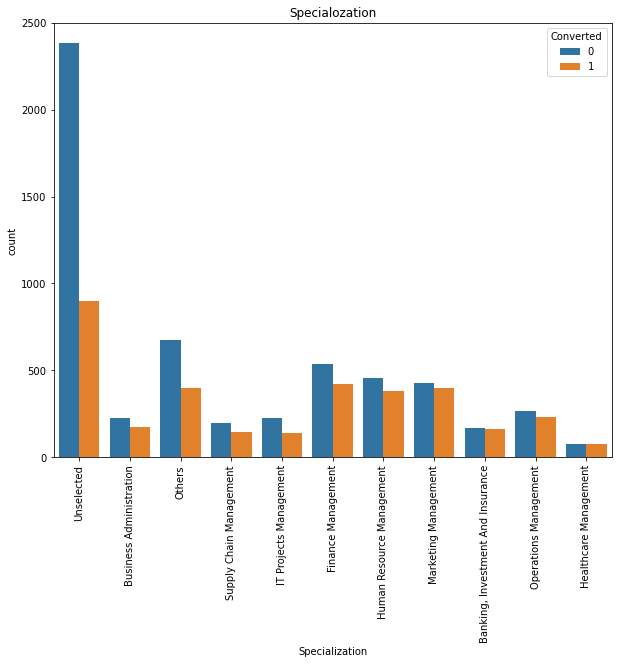

In [55]:
plt.figure(figsize = (10,8))
sns.countplot(df['Specialization'], hue = df['Converted'], data  = df)
plt.title('Specialozation')
plt.xticks(rotation = 90)

Almost all the specializations have similar conversion rates

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

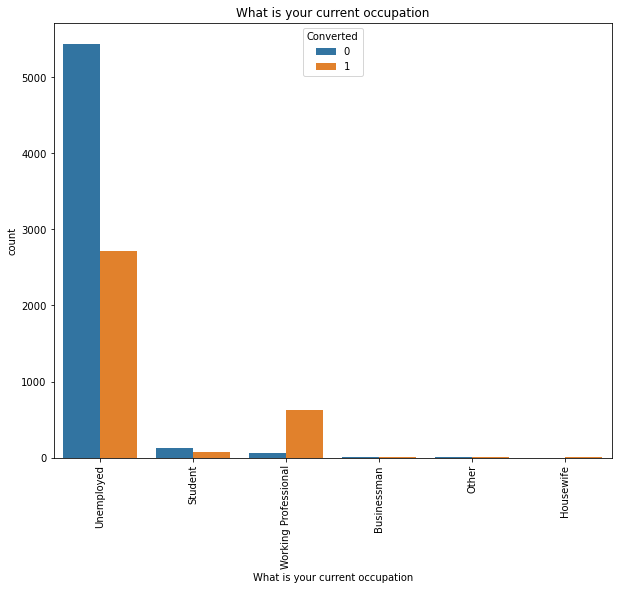

In [56]:
plt.figure(figsize = (10,8))
sns.countplot(df['What is your current occupation'],hue =  df['Converted'], data = df)
plt.title('What is your current occupation')
plt.xticks(rotation = 90)

- Here we can see that 'Unemployed' have a good conversion rate
- working professionals have a very good conversion rate

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

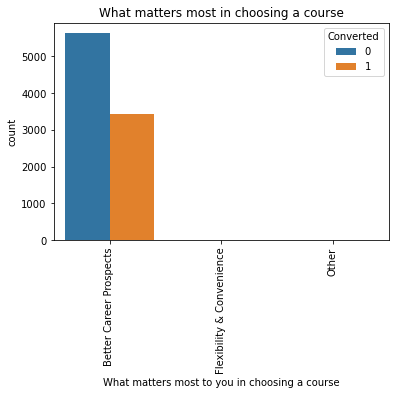

In [57]:
sns.countplot(df['What matters most to you in choosing a course'], hue = df['Converted'], data = df)
plt.title('What matters most in choosing a course')
plt.xticks(rotation = 90)

In [58]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [59]:
df = df.drop(['What matters most to you in choosing a course'], axis = 1)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

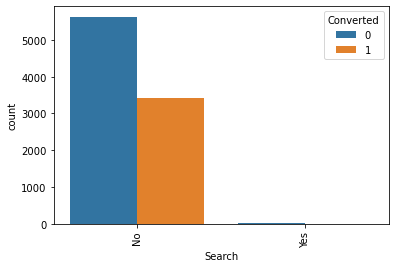

In [60]:
sns.countplot(df['Search'], hue = df['Converted'], data = df)
plt.xticks(rotation = 90)

In [61]:
df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [62]:
df = df.drop(['Search'], axis =1)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

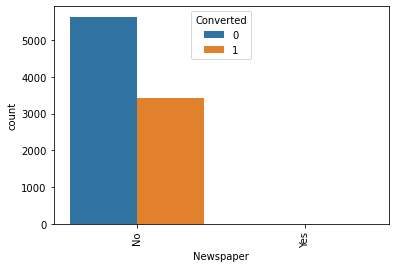

In [63]:
sns.countplot(df['Newspaper'], hue = df['Converted'], data = df)
plt.xticks(rotation = 90)

In [64]:
df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [65]:
df = df.drop(['Newspaper'], axis = 1)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

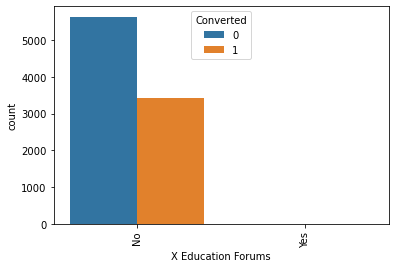

In [66]:
sns.countplot(df['X Education Forums'], hue = df['Converted'], data = df)
plt.xticks(rotation = 90)

In [67]:
df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [68]:
df = df.drop(['X Education Forums'], axis = 1)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

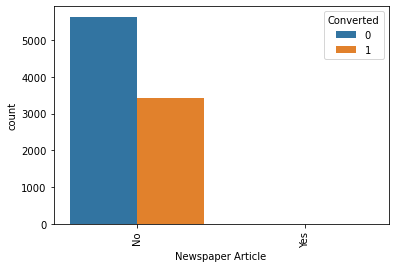

In [69]:
sns.countplot(df['Newspaper Article'], hue = df['Converted'], data = df)
plt.xticks(rotation = 90)

In [70]:
df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [71]:
df = df.drop(['Newspaper Article'], axis = 1)

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0]), [Text(0, 0, 'No')])

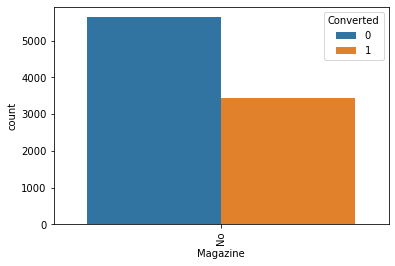

In [72]:
sns.countplot(df['Magazine'], hue = df['Converted'], data = df)
plt.xticks(rotation = 90)

In [73]:
df['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [74]:
df = df.drop(['Magazine'], axis = 1)

In [75]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [76]:
df['Lead Number'].value_counts()

655360    1
609951    1
619195    1
600768    1
631489    1
         ..
585039    1
648526    1
625995    1
580937    1
608255    1
Name: Lead Number, Length: 9074, dtype: int64

In [77]:
df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [78]:
df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [79]:
df['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [80]:
df['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [81]:
df['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [82]:
df['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [83]:
df = df.drop(['Lead Number', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], axis = 1)

In [84]:
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: Last Notable Activity, dtype: int64

/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

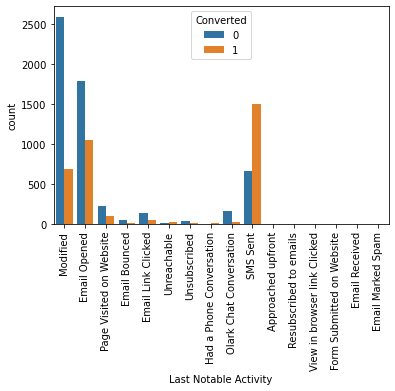

In [85]:
sns.countplot(df['Last Notable Activity'], hue = df['Converted'], data = df)
plt.xticks(rotation = 90)

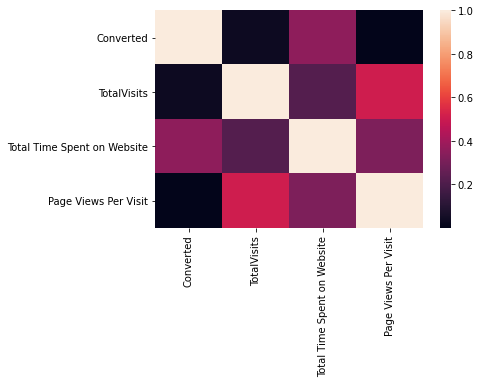

In [86]:
sns.heatmap(df.corr())
plt.show()

In [87]:
df['TotalVisits'].describe(percentiles = [0.05,0.25,0.5,0.75,0.90,0.95,0.99]) 

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

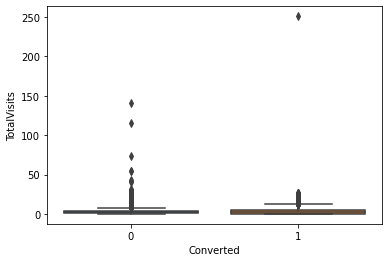

In [88]:
sns.boxplot(x = df['Converted'],  y = df ['TotalVisits'])

- Medians for the leads are the same

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

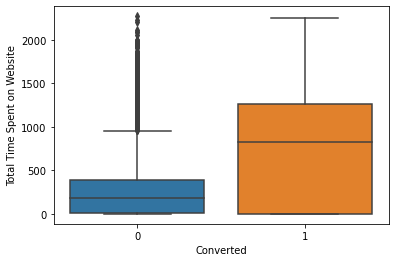

In [89]:
sns.boxplot(x = df['Converted'],  y = df ['Total Time Spent on Website'])

- People who spend more time on the website get converted 

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

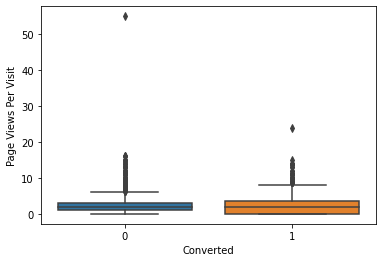

In [90]:
sns.boxplot(x = df['Converted'],  y = df ['Page Views Per Visit'])

- Medians are the same

In [91]:
df[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']].describe(percentiles = [0.05,0.25,0.5,0.75,0.90,0.95,0.99]) 

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


/home/prabhanshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

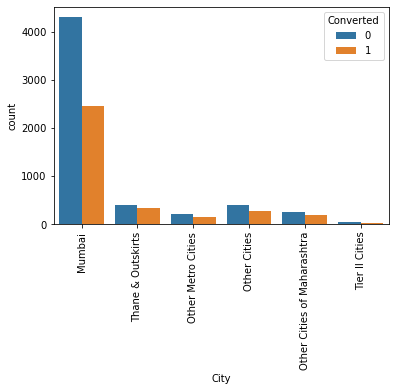

In [92]:
sns.countplot(df['City'], hue = df['Converted'], data = df)
plt.xticks(rotation = 90)

- Mumbai has the highes leads and the highest conversion 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   City                             9074 non-null   object 
 10  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


In [94]:
df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [95]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
blog                    1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [96]:
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: Last Notable Activity, dtype: int64

- Creating dummies of the categorical variables

In [97]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity']], drop_first = True)
df = pd.concat ([df, dummy], axis =1)
df = df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity'], axis = 1)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 63 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Direct Traffic                            9074

In [99]:
# You can start with the feature mapping and then train test split and then performing the analysis